<a href="https://colab.research.google.com/github/ahmedeElsharkawy/ahmedeElsharkawy.github.io/blob/master/classAct_ml1_8nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the libraries required for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
HTrain = pd.read_csv("https://storage.googleapis.com/dimensionless/ML_with_Python/Chapter%203%20Linear%20Regression/housing_train.csv")
HTrain.shape


(16512, 9)

In [4]:
HTrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654,103000.0
1,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620,382100.0
2,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349,172600.0
3,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947,93400.0
4,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583,96500.0


In [5]:
HTrain.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [6]:
HTrain.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [7]:
HTrain.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-0.006282,0.005285,-0.002479,0.002861,0.003953,0.000862,0.001170,0.005308,207194.693738
std,1.001083,1.000358,1.001370,0.996830,0.999107,1.004081,0.996462,1.002378,115622.626448
min,-2.385992,-1.442886,-2.196180,-1.207283,-1.277688,-1.256123,-1.303984,-1.774299,14999.000000
25%,-1.118200,-0.796789,-0.845393,-0.541705,-0.572483,-0.562043,-0.574229,-0.686382,119800.000000
50%,0.528931,-0.642287,0.028646,-0.232294,-0.238062,-0.228249,-0.234201,-0.171005,179850.000000
75%,0.778496,0.977638,0.664310,0.240303,0.262675,0.265378,0.278458,0.475058,265125.000000
max,2.625280,2.958068,1.856182,16.815580,14.087789,30.250330,14.601520,5.858286,500001.000000


Text(0.5, 1.0, 'correlation between median Income and Median Value')

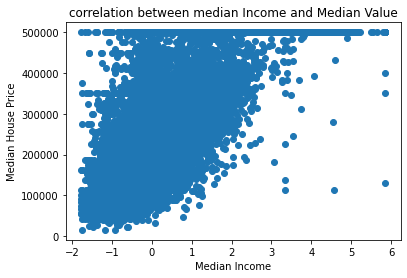

In [8]:
plt.scatter(HTrain['median_income'],HTrain['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title('correlation between median Income and Median Value')

In [9]:
HTrain['median_income'].corr(HTrain['median_house_value'])


0.6906466061467708

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [11]:
lin_reg=LinearRegression()

In [12]:
# lin_reg.fit(,HTrain['median_house_value'])
a=HTrain[['median_income']]
b=HTrain[['median_house_value']]
lin_reg.fit(a,b)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lin_reg.coef_

array([[79664.90785833]])

In [14]:
lin_reg.intercept_

array([206771.86405798])

In [15]:
lin_reg.score(HTrain[['median_income']],HTrain[['median_house_value']])


0.47699273458205255

In [16]:
y_pred_train = lin_reg.predict(HTrain[['median_income']]) #Predict the values on the Train Set 
y_pred_train[:5] #The first 5 predicted values/y-cap


array([[181147.30465315],
       [204332.52998299],
       [218749.38740458],
       [125916.23161656],
       [193501.01668457]])

In [17]:
lin_rmse=np.sqrt(mean_squared_error(HTrain['median_house_value'],y_pred_train))

Text(0.5, 1.0, 'Linear Regression on median_income ~ median_house_value')

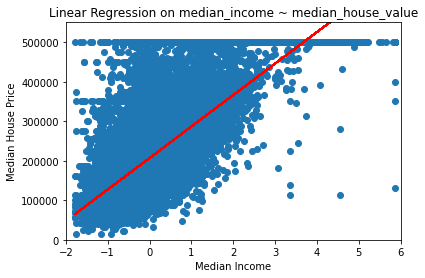

In [18]:
plt.scatter(HTrain[['median_income']],HTrain['median_house_value'])
plt.plot(HTrain[['median_income']],y_pred_train,'r') #'r' - Red color line
plt.axis([-2,6,0,550000]) #range on the x-axis & y-axis
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title('Linear Regression on median_income ~ median_house_value')


In [19]:
from sklearn.linear_model import SGDRegressor


In [20]:
gdeg=SGDRegressor()

In [21]:
a=HTrain[['median_income']]
b=HTrain['median_house_value']
gdeg.fit(a,b)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [22]:
gdeg.intercept_

array([205668.76846917])

In [23]:
gdeg.coef_

array([79250.10306116])

In [24]:
gdeg.score(a,b)

0.47688841257398046

In [25]:
y_pred_gd=gdeg.predict(a)

Text(0.5, 1.0, 'Best fit using Gradient Descent')

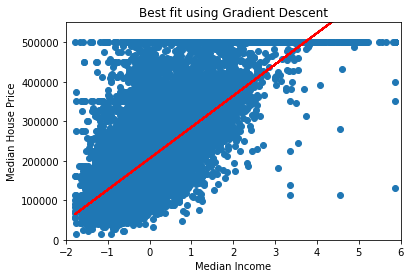

In [26]:
plt.scatter(HTrain[['median_income']],HTrain['median_house_value'])
plt.plot(HTrain[['median_income']],y_pred_gd,'r')
plt.axis([-2,6,0,550000])
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title('Best fit using Gradient Descent')


## multiple regression model

In [29]:
model_all=LinearRegression()

In [28]:
HTrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654,103000.0
1,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620,382100.0
2,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349,172600.0
3,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947,93400.0
4,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583,96500.0


In [33]:
x_train=HTrain.drop('median_house_value',axis=1)
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654
1,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620
2,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349
3,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947
4,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583


In [34]:
y_train=HTrain['median_house_value']
y_train.head()

0    103000.0
1    382100.0
2    172600.0
3     93400.0
4     96500.0
Name: median_house_value, dtype: float64

In [35]:
model_all.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
model_all.coef_

array([-85413.28005747, -90669.13624699,  14885.95835764, -17862.58294108,
        48757.37209674, -43589.91735845,  17717.71485854,  77013.87535191])

In [38]:
model_all.intercept_

206640.6370318638

In [39]:
model_all.score(x_train,y_train)

0.6400947924305292

In [40]:
y_pred_all=model_all.predict(x_train)

In [41]:
rmse_all=np.sqrt(mean_squared_error(y_train,y_pred_all))
rmse_all

69362.34135238081

In [42]:
HTrain.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


## model with longitude

In [43]:
model1=LinearRegression()

In [44]:
model1.fit(x_train[['longitude']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
model1.intercept_

207161.06474598034

In [46]:
model1.coef_

array([-5353.18054039])

In [48]:
model1.score(x_train[['longitude']],y_train)

0.0021482189561506937

## add 2

In [49]:
model1.fit(x_train[['longitude','latitude']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
model1.coef_

array([-141889.12431787, -147795.69758896])

In [51]:
model1.intercept_

207084.4075166661

In [52]:
model1.score(x_train[['longitude','latitude']],y_train)

0.23977500440286728

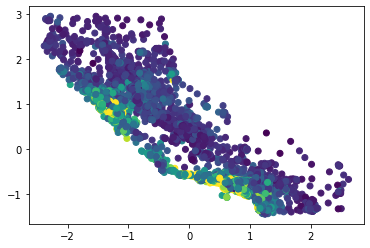

In [53]:

plt.scatter(x=HTrain['longitude'],y=HTrain['latitude'],c=HTrain['median_house_value'])

## adding 3

In [56]:
model1.fit(x_train[['longitude','latitude','housing_median_age']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
model1.coef_

array([-143091.95032316, -148898.94074323,   -1803.0265797 ])

In [58]:
model1.intercept_

207078.21161327386

In [59]:
model1.score(x_train[['longitude','latitude','housing_median_age']],y_train)

0.24000307748194905

In [61]:
model1.fit(x_train[['longitude','latitude','housing_median_age','total_rooms']],y_train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(x_train[['longitude','latitude','housing_median_age','total_rooms']],y_train)


Coefficients :  [-139918.19489232 -145458.44039198    5180.33149439   18588.32272379]
Intercept :  207044.09690195063


0.26221824117424786

In [62]:
model1.fit(x_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms']],y_train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(x_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms']],y_train)


Coefficients :  [-140821.79695263 -148740.880461      6374.50953443   88723.50645406
  -74804.09155293]
Intercept :  207153.79553383638


0.31771834380202746

In [64]:
model1.fit(x_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population']],y_train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(x_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population']],y_train)


Coefficients :  [-144389.62331851 -155699.63277662    6583.01551464  108502.58659167
  -38029.63257305  -62562.8816911 ]
Intercept :  207020.6342050893


0.3801845000742564

In [65]:
model1.fit(x_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households']],y_train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(x_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households']],y_train)


Coefficients :  [-139798.10182907 -151645.85741153    6391.26182068  108158.05257741
  -72441.0594132   -71027.870383     43062.25888446]
Intercept :  207121.53176075255


0.3840491803301824

In [66]:
model1.fit(x_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']],y_train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(x_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']],y_train)


Coefficients :  [-85413.28005747 -90669.13624699  14885.95835764 -17862.58294108
  48757.37209674 -43589.91735845  17717.71485854  77013.87535191]
Intercept :  206640.6370318638


0.6400947924305292

In [67]:
from sklearn.feature_selection import SelectKBest, f_regression


In [71]:
X_train=x_train
select_feature = SelectKBest(f_regression, k = 6).fit(x_train, y_train) #Selecting best 6 features on the basis f_regression score


In [73]:
select_feature.scores_ #Score for each variable/This is not R square value


array([3.55434501e+01, 3.44579030e+02, 1.79495552e+02, 3.01823325e+02,
       3.80956840e+01, 1.11961694e+01, 6.72961323e+01, 1.50574391e+04])

In [72]:
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'P_values':select_feature.pvalues_})
selected_features_df.sort_values(by='P_values', ascending=True)


,Feature,P_values
7,median_income,0.000000e+00
1,latitude,3.821798e-76
3,total_rooms,5.203989e-67
2,housing_median_age,1.019198e-40
6,households,2.506830e-16
4,total_bedrooms,6.893182e-10
0,longitude,2.545051e-09
5,population,8.214916e-04


In [ ]:
#Sequence followed in sklearn ML modeling
#fit()
#score()
#check attributes of the model - coef_ and intercept_
#predict()
#evaluate the metric (R square/RMSE/MSE for Regression, Accuracy/Sensitivity/Specicity for Classification)


In [74]:
X_train_new = select_feature.transform(X_train) #Selecting the best k (k = 6) features for modeling
X_train_new.shape #Dimenision of the new DataFrame


(16512, 6)

In [75]:
model_kbest = model_all.fit(X_train_new,y_train) 


In [76]:
model_kbest.coef_ #Coefficients


array([ -7201.82086955,  24397.45111862, -54757.3570668 ,  63885.16881336,
          784.47820083,  93449.65845946])

In [77]:
model_kbest.score(X_train_new,y_train) #R square


0.5540145192388106

In [78]:
y_pred_kbest = model_kbest.predict(X_train_new) 


In [79]:
lin_rmse_kbest = np.sqrt(mean_squared_error(y_train, y_pred_kbest))
lin_rmse_kbest


77212.93113565829

In [80]:
from sklearn.feature_selection import RFE #Recursive Feature Elimination


In [81]:
rfe = RFE(estimator = model_all, step = 1) #Step = 1 means eliminating one feature at each iteration


In [82]:
rfe.fit(X_train, y_train) 


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [83]:
rfe.ranking_


array([1, 1, 5, 3, 1, 2, 4, 1])

In [84]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')


,Feature,Ranking
0,longitude,1
1,latitude,1
4,total_bedrooms,1
7,median_income,1
5,population,2
3,total_rooms,3
6,households,4
2,housing_median_age,5
